In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

In [9]:
df = pd.read_csv(r'./Windfreak_external10MHz_PD.csv', skiprows=351, names=['_0','ampdBm','freq','_1'], nrows=551)

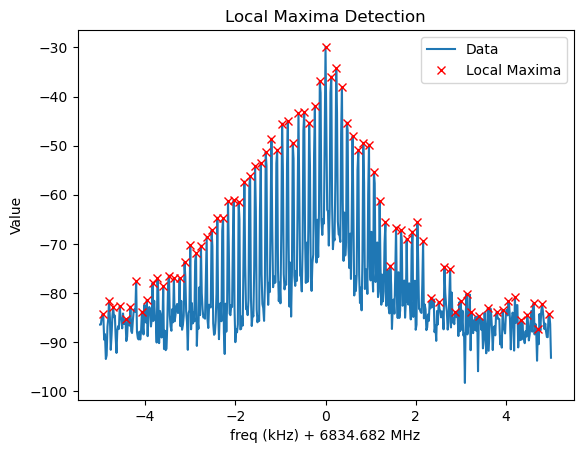

In [62]:
x,y = (df.freq-6834.682)*1e3, df.ampdBm

# Find the local maxima
peaks, _ = find_peaks(y, distance=5)

# Create a plot
fig, ax = plt.subplots()
ax.plot(x,y, label='Data')
ax.plot(x[peaks], y[peaks], "x", label='Local Maxima', color='red')

# Add labels and a legend
ax.set_xlabel('freq (kHz) + 6834.682 MHz')
ax.set_ylabel('Value')
ax.set_title('Local Maxima Detection')
ax.legend()

Average distance between peaks: -0.118 ± 0.02
Slope of the peak distances: 0.124 ± 0.000
Intercept of the peak distances: -5.01 ± 0.02


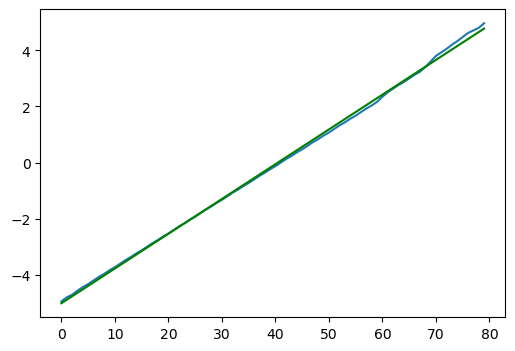

In [63]:
x, y = np.arange(len(peaks)), x[peaks].values
def linear_function(x, a, b):
    return a * x + b

# Fit the linear function to the peak distances
params, covariance = curve_fit(linear_function, x,y)
slope, intercept = params
slope_uncertainty = np.sqrt(covariance[0, 0])
intercept_uncertainty = np.sqrt(covariance[1, 1])

average_distance, std_distance = np.mean(y), np.std(np.diff(y))

fig, ax = plt.subplots(figsize=[6,4])
# Plot the original data
ax.plot(x,y, label='Data')
ax.plot(x, linear_function(x, *params), label='Fitted Line for Peak Distances', color='green')
# Display the average distance and slope
print(f"Average distance between peaks: {average_distance:.3f} ± {std_distance:.2f}")
print(f"Slope of the peak distances: {slope:.3f} ± {slope_uncertainty:.3f}")
print(f"Intercept of the peak distances: {intercept:.2f} ± {intercept_uncertainty:.2f}")

In [67]:
df = pd.read_csv(r'./Windfreak_external10MHz_PD_3HzRBW.csv', skiprows=351, names=['_0','ampdBm','freq','_1'], nrows=551)
df

,_0,ampdBm,freq,_1
0,P_0,-91.156,6834.677000,MHz
1,P_1,-90.692,6834.677018,MHz
2,P_2,-90.364,6834.677037,MHz
3,P_3,-91.852,6834.677055,MHz
4,P_4,-90.100,6834.677073,MHz
...,...,...,...,...
546,P_546,-90.188,6834.686928,MHz
547,P_547,-91.804,6834.686946,MHz
548,P_548,-91.820,6834.686964,MHz
549,P_549,-90.136,6834.686982,MHz


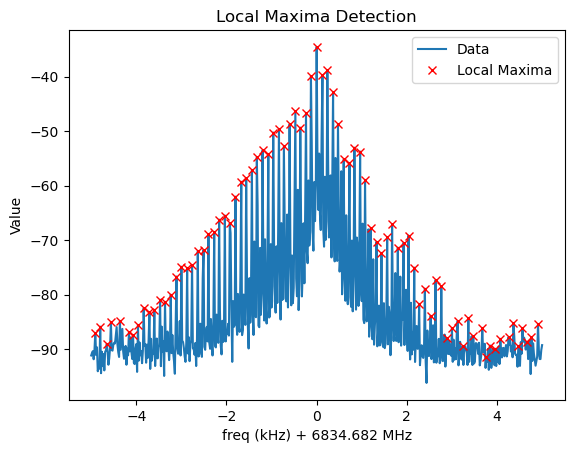

In [68]:
x,y = (df.freq-6834.682)*1e3, df.ampdBm

# Find the local maxima
peaks, _ = find_peaks(y, distance=5)

# Create a plot
fig, ax = plt.subplots()
ax.plot(x,y, label='Data')
ax.plot(x[peaks], y[peaks], "x", label='Local Maxima', color='red')

# Add labels and a legend
ax.set_xlabel('freq (kHz) + 6834.682 MHz')
ax.set_ylabel('Value')
ax.set_title('Local Maxima Detection')
ax.legend()

Average distance between peaks: 0.058 ± 0.02
Slope of the peak distances: 0.120 ± 0.000
Intercept of the peak distances: -4.82 ± 0.01


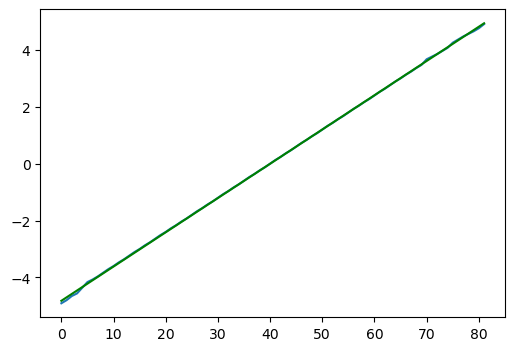

In [69]:
x, y = np.arange(len(peaks)), x[peaks].values
def linear_function(x, a, b):
    return a * x + b

# Fit the linear function to the peak distances
params, covariance = curve_fit(linear_function, x,y)
slope, intercept = params
slope_uncertainty = np.sqrt(covariance[0, 0])
intercept_uncertainty = np.sqrt(covariance[1, 1])

average_distance, std_distance = np.mean(y), np.std(np.diff(y))

fig, ax = plt.subplots(figsize=[6,4])
# Plot the original data
ax.plot(x,y, label='Data')
ax.plot(x, linear_function(x, *params), label='Fitted Line for Peak Distances', color='green')
# Display the average distance and slope
print(f"Average distance between peaks: {average_distance:.3f} ± {std_distance:.2f}")
print(f"Slope of the peak distances: {slope:.3f} ± {slope_uncertainty:.3f}")
print(f"Intercept of the peak distances: {intercept:.2f} ± {intercept_uncertainty:.2f}")